## 음식점 추천프로그램

## 주소 좌표로 변환코드

In [1]:


import requests  # 웹 요청을 보내기 위한 모듈을 가져옴
import json  # JSON 데이터를 처리하기 위한 모듈을 가져옴
def addr_lat_lon(addr):
    api_key = "fa9d65e53485f7e50f58c55f48c7b05b"
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query={address}'.format(address=addr)
    headers = {"Authorization": "KakaoAK " + api_key}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address']
    return float(match_first['x']), float(match_first['y'])

print(addr_lat_lon("충북 청주시 서원구 서원남로 57 1층 (우)28680"))#주소를 좌표로 변환


(127.481742286798, 36.6221861459943)


## 엑셀 정보 추가시킨코드 중 카페(예시)

In [ ]:
import requests
import json
from openpyxl import Workbook, load_workbook

def create_cafe_file():
    wb = Workbook()
    ws = wb.active
    ws.append(["카페이름", "주소", "위도", "경도"])
    wb.save("cafes.xlsx")

def addr_lat_lon(addr):
    api_key = "fa9d65e53485f7e50f58c55f48c7b05b"
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query={address}'.format(address=addr)
    headers = {"Authorization": "KakaoAK " + api_key}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address']
    return float(match_first['x']), float(match_first['y'])

def add_cafe():
    wb = load_workbook("cafes.xlsx")
    ws = wb.active
    
    while True:
        cafe_name = input("카페이름 (종료하려면 -1을 입력하세요): ")
        if cafe_name == "-1":
            break
        
        address = input("주소: ")
        latitude, longitude = addr_lat_lon(address)  # 주소를 좌표로 변환
        ws.append([cafe_name, address, longitude, latitude])
    
    wb.save("cafes.xlsx")

def read_cafes():
    wb = load_workbook("cafes.xlsx")
    ws = wb.active
    for row in ws.iter_rows(values_only=True):
        print(row)

# 예제 사용
create_cafe_file()  # 파일 생성 (처음 한 번만 호출)
add_cafe()  # 카페 추가
read_cafes()  # 저장된 카페 정보 읽기

## 다익스트라 알고리즘

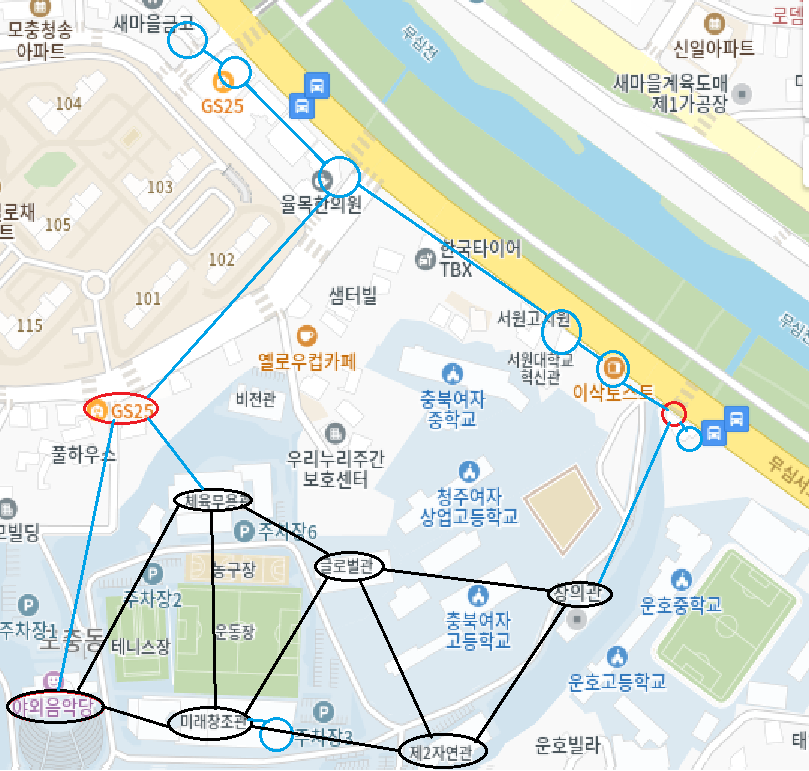

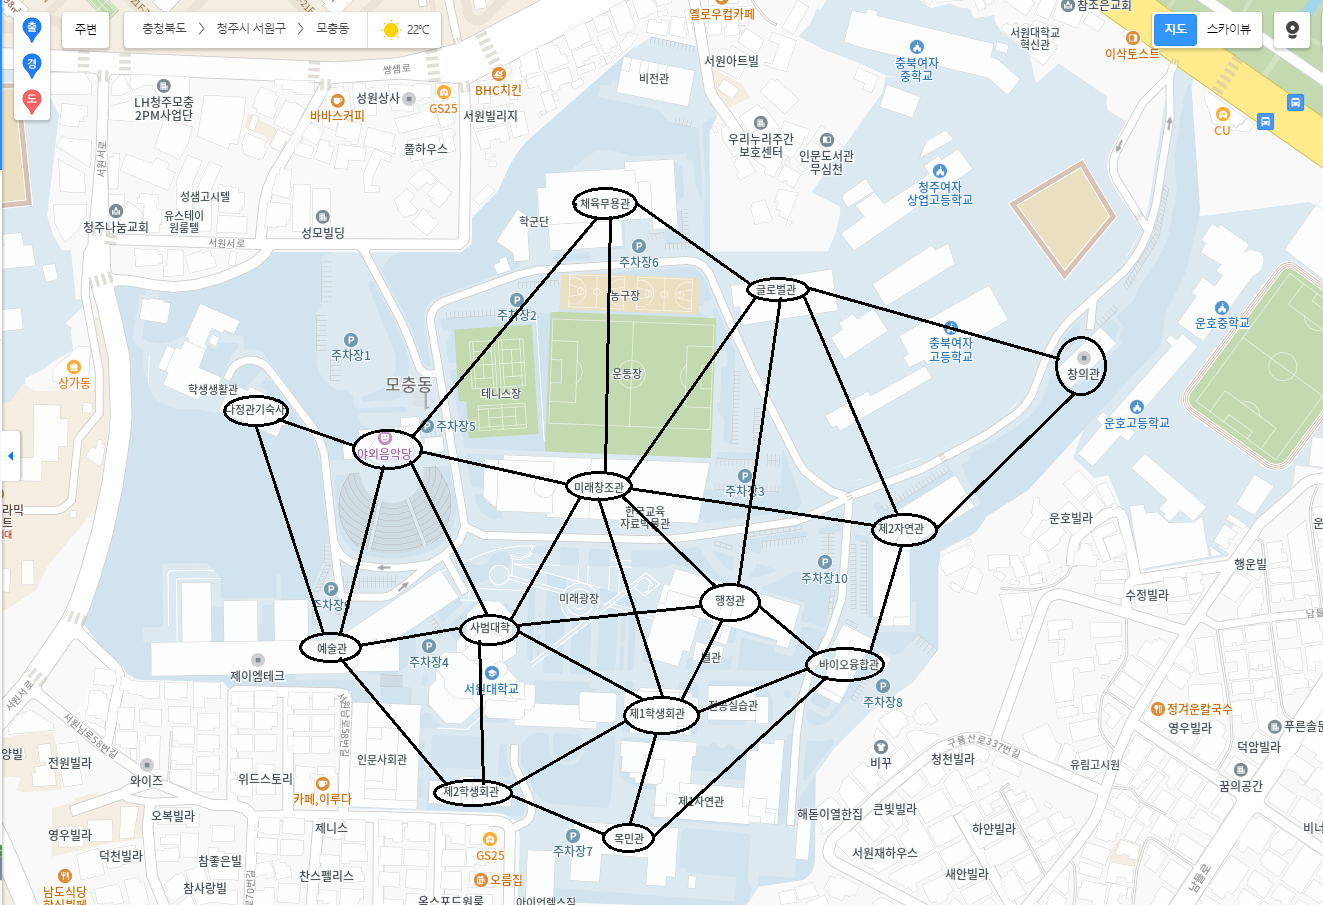

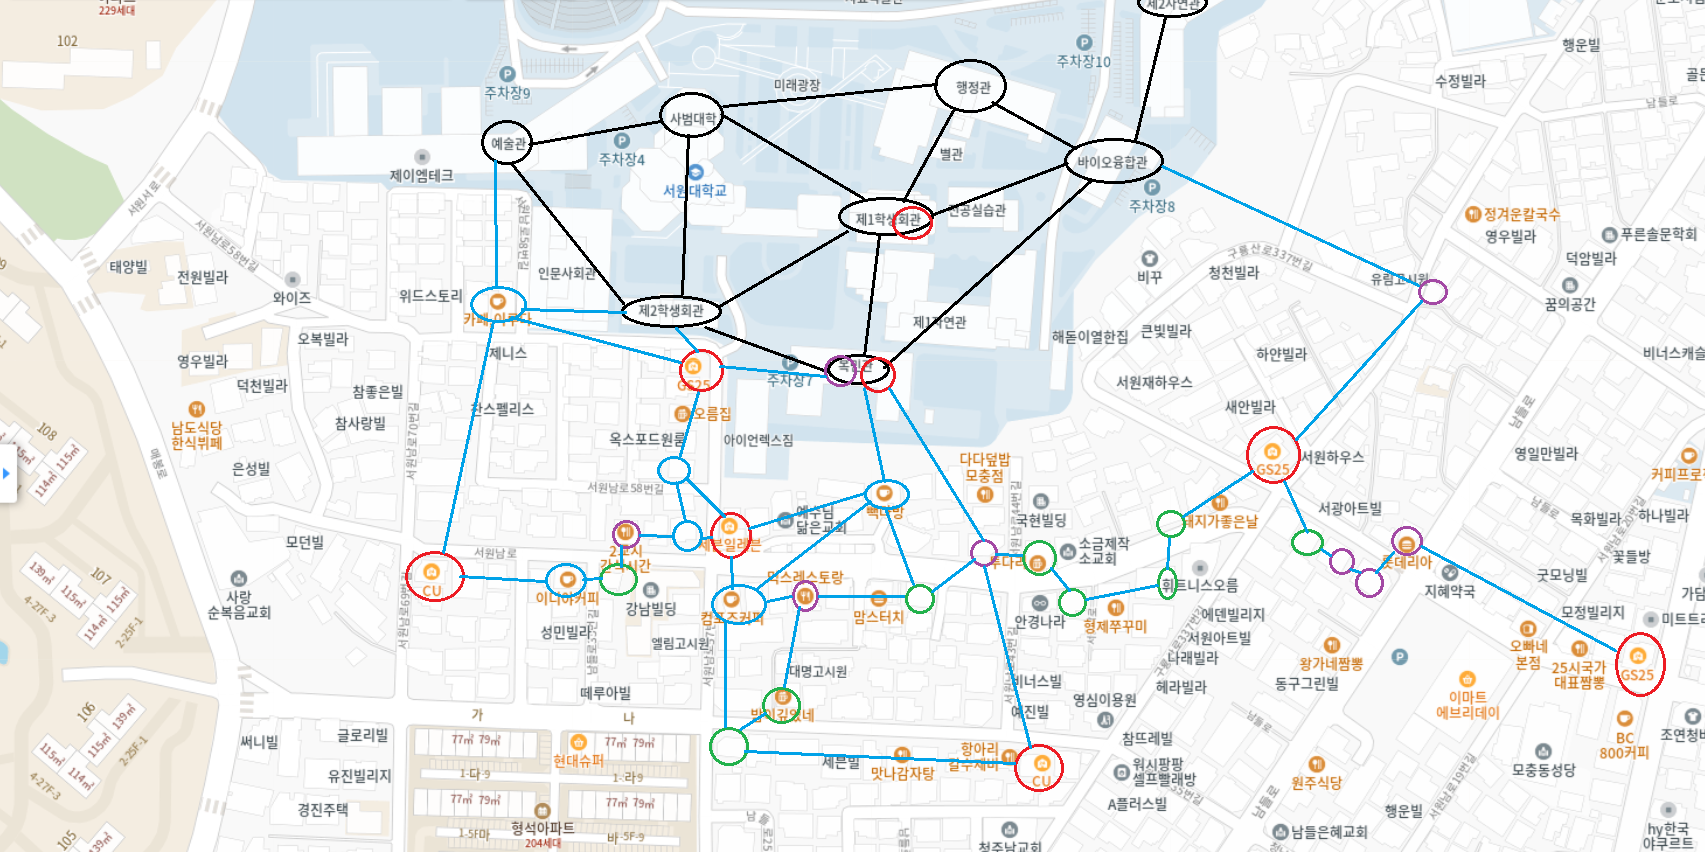

In [9]:
import pandas as pd  # pandas 라이브러리를 pd로 가져옴
import heapq  # heapq 라이브러리를 가져옴

# 엑셀 데이터 읽기
file_name = "C:/Users/User/Desktop/학교/동아리&&뇌파/음식점길찾기_파이썬/AL.xlsx"  # 파일 경로 지정
df = pd.read_excel(file_name)  # 엑셀 파일을 읽어서 DataFrame 객체로 변환함. 첫 번째 시트를 자동으로 읽어옴

# 그래프 생성
def create_graph(df):
    graph = {}  # 그래프를 저장할 빈 딕셔너리 생성
    for index, row in df.iterrows():  # 데이터프레임의 각 행에 대해 반복
        u, v, w = row['지점1'], row['지점2'], row['거리']  # 현재 행의 지점1, 지점2, 거리 값을 가져옴
        if u not in graph:  # 지점1이 그래프에 없으면
            graph[u] = []  # 그래프에 빈 리스트를 할당함
        if v not in graph:  # 지점2가 그래프에 없으면
            graph[v] = []  # 그래프에 빈 리스트를 할당함
        graph[u].append((v, w))  # 지점1에서 지점2로 가는 간선과 거리를 그래프에 추가함
        graph[v].append((u, w))  # 지점2에서 지점1로 가는 간선과 거리를 그래프에 추가함
    return graph  # 완성된 그래프를 반환함

# 다익스트라 알고리즘
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}  # 그래프의 모든 노드까지의 거리를 무한대로 초기화함
    distances[start] = 0  # 시작 노드의 거리를 0으로 초기화함
    priority_queue = [(0, start)]  # 우선순위 큐를 생성하고, 시작 노드를 추가함
    
    while priority_queue:  # 우선순위 큐가 비어 있지 않은 동안 반복함
        current_distance, current_node = heapq.heappop(priority_queue)  # 우선순위 큐에서 가장 짧은 거리의 노드를 꺼냄
        
        if current_distance > distances[current_node]:  # 꺼낸 노드의 거리가 이미 계산된 거리보다 크면
            continue  # 건너뜀
        
        for neighbor, weight in graph[current_node]:  # 현재 노드의 이웃 노드에 대해 반복함
            distance = current_distance + weight  # 현재 노드를 거쳐 이웃 노드에 도달하는 거리를 계산함
            
            if distance < distances[neighbor]:  # 계산된 거리가 기존의 거리보다 짧으면
                distances[neighbor] = distance  # 거리를 업데이트함
                heapq.heappush(priority_queue, (distance, neighbor))  # 우선순위 큐에 새로운 거리와 이웃 노드를 추가함
    
    return distances  # 모든 노드까지의 최단 거리를 반환함

# 결과 출력
def print_distances(distances):
    sorted_distances = sorted(distances.items(), key=lambda item: item[1])  # 거리를 기준으로 정렬된 튜플 리스트 생성
    for node, distance in sorted_distances:  # 정렬된 튜플 리스트를 순회하며 출력함
        print(f"{node} 거리 {distance}")

# 메인 함수
def main(start_node):
    graph = create_graph(df)  # 그래프 생성
    distances = dijkstra(graph, start_node)  # 다익스트라 알고리즘을 사용하여 최단 거리 계산
    print_distances(distances)  # 계산된 최단 거리 출력

if __name__ == "__main__":
    start_node = '목민관'  # 시작 노드 이름 지정
    main(start_node)  # 메인 함수 호출

GS25 서원대목민관점 거리 0
목민관 거리 0
더큰도시락 청주서원대점 거리 0
빽다방 서원대점 거리 53
GS25 서원대후문점 거리 93
제2학생회관 거리 105
GS25 서원대점 거리 120
제1학생회관 거리 120
포차하이세 거리 129
면식당 서원대점 거리 151
세븐일레븐 서원대점 거리 157
컴포즈커피 청주서원대점 거리 173
투다리 서원대점 거리 177
메가MGC커피 서원대점 거리 192
카페, 이루다 거리 197
바이오융합관 거리 199
해적카페&와플그래 서원대점 거리 202
행정관 거리 202
해적카페&와플그래 거리 203
서원빈대떡 거리 203
믹스토랑 서원대점 거리 219
그라찌에 서원대학교점 거리 250
미래창조관 거리 250
감성청춘포차 거리 256
홍치킨 거리 257
사범대학 거리 259
2교시간식시간 거리 264
밤이깊었네 거리 279
주주상회 거리 280
맥주집 거리 280
제2자연관 거리 288
CU 청주서원대스타점 거리 291
이디야커피 서원대점 거리 296
예술관 거리 351
GS25 서원대학사점 거리 362
CU 청주서원대점 거리 370
글로벌관 거리 382
서대포차 거리 392
야외음악당 거리 407
럭키마라탕 양꼬치 서원대점 거리 414
체육무용관 거리 435
속시원한칼국수 거리 442
롯데리아 서원대점 거리 452
임마누엘 거리 467
창의관 거리 488
다정다애관 거리 504
GS25 모충행복점 거리 594
CU 서원대정문점 거리 676
대성당 거리 696
GS25 서원트릴로채점 거리 707
이삭토스트 청주서원대정문점 거리 754
신전떡볶이 모충점 거리 813
메가MGC커피 청주모충점 거리 995
더벤티 청주모충트릴로채점 거리 1153
겸하당 거리 1195


가까운순중 원하는 종류만 리스트만들기

In [ ]:
# 결과 출력
def print_distances(Alldistances):
    distances = []
    sorted_distances = sorted(Alldistances.items(), key=lambda item: item[1])  # 거리를 기준으로 정렬된 튜플 리스트 생성
    for node, distance in sorted_distances:  # 정렬된 튜플 리스트를 순회하며 출력함
        distances.append(node)
    return distances

# 다익스트라 총 과정
def ALL_dijkstra(start_node):
    graph = create_graph(df)  # 그래프 생성
    Alldistances = dijkstra(graph, start_node)  # 다익스트라 알고리즘을 사용하여 최단 거리 계산
    return print_distances(Alldistances)  # 계산된 최단 거리 출력
    
# 특정이름 리스트로 묶기    
def find_duplicate_names(xl, distances):
    xl_names = xl['이름'].tolist()  # 열 이름을 리스트로 추출
    duplicate_names = [name for name in distances if name in xl_names]
    return duplicate_names
    

## 프로젝트코드

In [2]:
import tkinter as tk  # tkinter 라이브러리를 tk로 가져옵니다.
from tkinter import messagebox  # tkinter에서 messagebox 모듈을 가져옵니다.
import folium  # Folium 라이브러리를 사용하여 지도를 생성할 수 있음
import webbrowser  # 웹 브라우저를 열기 위한 모듈을 가져옵니다.
import requests  # 웹 요청을 보내기 위한 모듈을 가져옵니다.
import json  # JSON 데이터를 처리하기 위한 모듈을 가져옵니다.
import pandas as pd  # pandas 라이브러리를 pd로 가져옵니다.
import heapq  # heapq 라이브러리를 가져옵니다.
from functools import partial

distances = None
user_location = None

# 엑셀 데이터 읽기
file_name = "C:/Users/User/Desktop/학교/동아리&&뇌파/음식점길찾기_파이썬/AL.xlsx"  # 파일 경로 지정
df = pd.read_excel(file_name)  # 엑셀 파일을 읽어서 DataFrame 객체로 변환함. 첫 번째 시트를 자동으로 읽어옴

# 로그인창
def show_login():
    login_frame.pack()           # 로그인창
    register_frame.pack_forget() #회원가입창 숨기기
    location_frame.pack_forget() # 위치버튼 숨기기

# 회원가입창
def show_register():
    register_frame.pack()        #회원가입창
    login_frame.pack_forget()    # 로그인창 숨기기
    location_frame.pack_forget() # 위치버튼 숨기기

#위치선택창
def location():
    location_frame.pack()        # 위치버튼
    login_frame.pack_forget()     # 로그인창 숨기기
    register_frame.pack_forget() #회원가입창 숨기기
    select_frame.pack_forget()   #로그인 및 회원가입창 숨기기
    
#음식점추천창
def choose():
    choose_frame.pack()          # 음식점
    location_frame.pack_forget() # 위치버튼 숨기기
    login_frame.pack_forget()    # 로그인창 숨기기
    register_frame.pack_forget() #회원가입창 숨기기
    select_frame.pack_forget()  #로그인 및 회원가입창 숨기기
    
#음식점추천창
def food():
    food_frame.pack()            # 카페 음식점 술집 편의점
    choose_frame.pack_forget()   # 음식점 숨기기
    location_frame.pack_forget() # 위치버튼 숨기기
    login_frame.pack_forget()    # 로그인창 숨기기
    register_frame.pack_forget() #회원가입창 숨기기
    select_frame.pack_forget()  #로그인 및 회원가입창 숨기기
    

    
    
# 위치선택창으로 뒤로가기
def go_back1():
    choose_frame.pack_forget() # 현재 화면 숨기기
    location_frame.pack()# 이전 화면으로 변경
    
# 즐겨찾기,음식점추천으로 뒤로가기
def go_back2():
    food_frame.pack_forget() # 현재 화면 숨기기
    choose_frame.pack()# 이전 화면으로 변경

# 그래프 생성
def create_graph(df):
    graph = {}  # 그래프를 저장할 빈 딕셔너리 생성
    for index, row in df.iterrows():  # 데이터프레임의 각 행에 대해 반복
        u, v, w = row['지점1'], row['지점2'], row['거리']  # 현재 행의 지점1, 지점2, 거리 값을 가져옴
        if u not in graph:  # 지점1이 그래프에 없으면
            graph[u] = []  # 그래프에 빈 리스트를 할당함
        if v not in graph:  # 지점2가 그래프에 없으면
            graph[v] = []  # 그래프에 빈 리스트를 할당함
        graph[u].append((v, w))  # 지점1에서 지점2로 가는 간선과 거리를 그래프에 추가함
        graph[v].append((u, w))  # 지점2에서 지점1로 가는 간선과 거리를 그래프에 추가함
    return graph  # 완성된 그래프를 반환함

# 다익스트라 알고리즘
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}  # 그래프의 모든 노드까지의 거리를 무한대로 초기화함
    distances[start] = 0  # 시작 노드의 거리를 0으로 초기화함
    priority_queue = [(0, start)]  # 우선순위 큐를 생성하고, 시작 노드를 추가함
    
    while priority_queue:  # 우선순위 큐가 비어 있지 않은 동안 반복함
        current_distance, current_node = heapq.heappop(priority_queue)  # 우선순위 큐에서 가장 짧은 거리의 노드를 꺼냄
        
        if current_distance > distances[current_node]:  # 꺼낸 노드의 거리가 이미 계산된 거리보다 크면
            continue  # 건너뜀
        
        for neighbor, weight in graph[current_node]:  # 현재 노드의 이웃 노드에 대해 반복함
            distance = current_distance + weight  # 현재 노드를 거쳐 이웃 노드에 도달하는 거리를 계산함
            
            if distance < distances[neighbor]:  # 계산된 거리가 기존의 거리보다 짧으면
                distances[neighbor] = distance  # 거리를 업데이트함
                heapq.heappush(priority_queue, (distance, neighbor))  # 우선순위 큐에 새로운 거리와 이웃 노드를 추가함
    
    return distances  # 모든 노드까지의 최단 거리를 반환함

# 결과 출력
def print_distances(Alldistances):
    distances = []
    sorted_distances = sorted(Alldistances.items(), key=lambda item: item[1])  # 거리를 기준으로 정렬된 튜플 리스트 생성
    for node, distance in sorted_distances:  # 정렬된 튜플 리스트를 순회하며 출력함
        distances.append(node)
    return distances

# 다익스트라 총 과정
def ALL_dijkstra(start_node):
    graph = create_graph(df)  # 그래프 생성
    Alldistances = dijkstra(graph, start_node)  # 다익스트라 알고리즘을 사용하여 최단 거리 계산
    return print_distances(Alldistances)  # 계산된 최단 거리 출력
    
# 특정이름 리스트로 묶기    
def find_duplicate_names(xl, distances):
    xl_names = xl['이름'].tolist()  # 열 이름을 리스트로 추출
    duplicate_names = [name for name in distances if name in xl_names]
    return duplicate_names

# 음식점, 술집, 편의점, 카페 가게버튼들
class ConvenienceStoreApp:
    def __init__(self, master, store_names, xl):        
        self.master = master
        self.store_names = store_names
        self.xl = xl
        self.current_index = 0
        self.markers = {}  # 마커 저장 딕셔너리
        self.selected_marker_name = None  # 선택된 마커 이름 저장
        self.map = None  # 지도 저장
        self.create_buttons()

        self.more_button = tk.Button(self.master, text="더 보기", command=self.show_more)
        self.more_button.grid(row=6, column=0, columnspan=2, sticky="ew", pady=5)

        self.create_map(show_all=False)

    def create_buttons(self):
        for i in range(self.current_index, min(self.current_index + 5, len(self.store_names))):
            name = self.store_names[i]
            button = tk.Button(self.master, text=name, command=partial(self.highlight_marker, name))
            button.grid(row=i, column=0, sticky="ew", pady=5)
        self.current_index += 5

    def show_more(self):
        for i in range(self.current_index, len(self.store_names)):
            name = self.store_names[i]
            button = tk.Button(self.master, text=name, command=partial(self.highlight_marker, name))
            button.grid(row=i, column=0, sticky="ew", pady=5)
        self.more_button.grid_forget()
        self.create_map(show_all=True)

    def create_map(self, show_all):
        center_location = [self.xl['위도'].mean(), self.xl['경도'].mean()]
        self.map = folium.Map(location=center_location, zoom_start=17)

        if show_all:
            store_list = self.store_names
        else:
            store_list = self.store_names[:5]

        for store_name in store_list:
            store_info = self.xl[self.xl['이름'] == store_name].iloc[0]
            location = [store_info['위도'], store_info['경도']]
            marker = folium.Marker(location=location, popup=store_name, icon=folium.Icon(color='blue'))
            marker.add_to(self.map)
            self.markers[store_name] = location

        folium.Marker(
            location=user_location,
            popup="현재 위치",
            icon=folium.Icon(color='green')
        ).add_to(self.map)

        self.map.save("map.html")
        webbrowser.open("map.html")

    def highlight_marker(self, store_name):
        if self.selected_marker_name:
            # 이전에 선택된 마커를 파란색으로 되돌림
            prev_location = self.markers[self.selected_marker_name]
            folium.Marker(
                location=prev_location,
                popup=self.selected_marker_name,
                icon=folium.Icon(color='blue')
            ).add_to(self.map)
        
        # 선택된 마커를 빨간색으로 변경
        new_location = self.markers[store_name]
        folium.Marker(
            location=new_location,
            popup=store_name,
            icon=folium.Icon(color='red')
        ).add_to(self.map)

        self.selected_marker_name = store_name

        self.map.save("map.html")
        webbrowser.open("map.html")

# 목민관에 마커 추가
def MokMingwan():
    global distances
    global user_location
    start_node = '목민관'  # 시작 노드 이름 지정
    distances = ALL_dijkstra(start_node)
    user_location = [36.6230, 127.4823]
    map = folium.Map(location=[36.6230, 127.4823], zoom_start=18) # 지도 생성
    folium.Marker(location=[36.6230, 127.4823], popup="목민관").add_to(map)
    map.save("map.html")
    webbrowser.open("map.html")
    choose()
    return distances
    
# 미래창조관에 마커 추가
def MiRaechangjogwan():
    global distances
    global user_location
    start_node = '미래창조관'  # 시작 노드 이름 지정
    distances = ALL_dijkstra(start_node)
    user_location = [36.6247,127.4820]
    map = folium.Map(location=[36.6247,127.4820], zoom_start=18) # 지도 생성
    folium.Marker(location=[36.6247,127.4820], popup="미래창조관").add_to(map)
    map.save("map.html")
    webbrowser.open("map.html")
    choose()
    return distances
    
# 다애다정관에 마커 추가
def Dajeongdaaegwan():
    global distances
    global user_location
    start_node = '다정다애관'  # 시작 노드 이름 지정
    distances = ALL_dijkstra(start_node)
    user_location = [36.6250,127.4802]
    map = folium.Map(location=[36.6250,127.4802], zoom_start=18) # 지도 생성
    folium.Marker(location=[36.6250,127.4802], popup="다애다정관").add_to(map)
    map.save("map.html")
    webbrowser.open("map.html")
    choose()
    return distances
    
# 글로벌관에 마커 추가
def Geulrobeolgwan():
    global distances
    global user_location
    start_node = '글로벌관'  # 시작 노드 이름 지정
    distances = ALL_dijkstra(start_node)
    user_location = [36.6255,127.4832]
    map = folium.Map(location=[36.6255,127.4832], zoom_start=18) # 지도 생성
    folium.Marker(location=[36.6255,127.4832], popup="글로벌관").add_to(map)
    map.save("map.html")
    webbrowser.open("map.html")
    choose()
    return distances

def cafes_all():
    xl = pd.read_excel("C:/Users/User/Desktop/학교/동아리&&뇌파/음식점길찾기_파이썬/cafes.xlsx")
    store_names = find_duplicate_names(xl, distances)
    print(distances)
    print("\n\n", store_names)
    root = tk.Tk()
    app = ConvenienceStoreApp(root, store_names, xl)
    root.mainloop()

def beers_all():
    xl = pd.read_excel("C:/Users/User/Desktop/학교/동아리&&뇌파/음식점길찾기_파이썬/beers.xlsx")
    store_names = find_duplicate_names(xl, distances)
    print(distances)
    print("\n\n", store_names)
    root = tk.Tk()
    app = ConvenienceStoreApp(root, store_names, xl)
    root.mainloop()
    
def foods_all():
    xl = pd.read_excel("C:/Users/User/Desktop/학교/동아리&&뇌파/음식점길찾기_파이썬/foods.xlsx")
    store_names = find_duplicate_names(xl, distances)
    print(distances)
    print("\n\n", store_names)
    root = tk.Tk()
    app = ConvenienceStoreApp(root, store_names, xl)
    root.mainloop()
    
def stores_all():
    xl = pd.read_excel("C:/Users/User/Desktop/학교/동아리&&뇌파/음식점길찾기_파이썬/stores.xlsx")
    store_names = find_duplicate_names(xl, distances)
    print(distances)
    print("\n\n", store_names)
    root = tk.Tk()
    app = ConvenienceStoreApp(root, store_names, xl)
    root.mainloop()    

# 로그인함수
def user_login():
    username = user_login_entry.get()
    password = user_login_password_entry.get()

    # 파일에서 아이디와 비밀번호 확인
    with open("users.txt", "r") as file:
        for line in file:
            try:
                stored_username, stored_password, _, _ = line.strip().split(',')
            except ValueError:
                continue
            if username == stored_username and password == stored_password:
                messagebox.showinfo("로그인 성공", "로그인에 성공했습니다.")
                map = folium.Map(location=[36.6241692016376, 127.482848437506], zoom_start=18) # 지도 생성
                map.save("map.html") # HTML 파일로 저장하고 웹 브라우저에서 열기
                webbrowser.open("map.html")
                location()  # 로그인 성공 시 위치창을 보여줌
                return 
        messagebox.showerror("로그인 실패", "아이디 또는 비밀번호가 잘못되었습니다.")

# 회원가입함수
def register():
    name = register_name_entry.get()
    username = register_username_entry.get()
    password = register_password_entry.get()
    phone = register_phone_entry.get()

    # 파일에서 중복된 아이디 확인
    with open("users.txt", "r") as file:
        for line in file:
            try:
                stored_username, _, _, _ = line.strip().split(',')
            except ValueError:
                continue
            if username == stored_username:
                messagebox.showerror("회원가입 실패", "이미 존재하는 아이디입니다.")
                return

    # 파일에 회원 정보 저장
    with open("users.txt", "a") as file:
        file.write(f"{username},{password},{name},{phone}\n")
        messagebox.showinfo("회원가입 성공", "회원가입에 성공했습니다.")
        
#주소를 좌표로 변환
def addr_lat_lon(addr):
    api_key = "fa9d65e53485f7e50f58c55f48c7b05b"
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query={address}'.format(address=addr)
    headers = {"Authorization": "KakaoAK " + api_key}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address']
    return float(match_first['x']), float(match_first['y'])



# Tkinter 창 생성
window = tk.Tk()
window.title("로그인")

# 사용자 로그인 및 회원가입을 선택할 수 있는 버튼 생성
select_frame = tk.Frame(window)
select_frame.pack(pady=10)
login_button = tk.Button(select_frame, text="사용자", command=show_login)
login_button.grid(row=0, column=0, padx=10)
register_button = tk.Button(select_frame, text="회원가입", command=show_register)
register_button.grid(row=0, column=1, padx=10)

# 사용자 로그인 창
login_frame = tk.Frame(window)
tk.Label(login_frame, text="아이디:").grid(row=0, column=0)
user_login_entry = tk.Entry(login_frame)
user_login_entry.grid(row=0, column=1)
tk.Label(login_frame, text="비밀번호:").grid(row=1, column=0)
user_login_password_entry = tk.Entry(login_frame, show="*")
user_login_password_entry.grid(row=1, column=1)
tk.Button(login_frame, text="로그인", command=user_login).grid(row=2, columnspan=2, pady=10)

# 회원가입 창
register_frame = tk.Frame(window)
tk.Label(register_frame, text="이름:").grid(row=0, column=0)
register_name_entry = tk.Entry(register_frame)
register_name_entry.grid(row=0, column=1)
tk.Label(register_frame, text="아이디:").grid(row=1, column=0)
register_username_entry = tk.Entry(register_frame)
register_username_entry.grid(row=1, column=1)
tk.Label(register_frame, text="비밀번호:").grid(row=2, column=0)
register_password_entry = tk.Entry(register_frame, show="*")
register_password_entry.grid(row=2, column=1)
tk.Label(register_frame, text="전화번호:").grid(row=3, column=0)
register_phone_entry = tk.Entry(register_frame)
register_phone_entry.grid(row=3, column=1)
tk.Button(register_frame, text="회원가입", command=register).grid(row=4, columnspan=2, pady=10)


#위치버튼
location_frame = tk.Frame(window)
label = tk.Label(location_frame, text="현재 위치를 선택하세요")
label.pack(side="top")
location_button1 = tk.Button(location_frame, text="목민관", command=MokMingwan)
location_button1.pack(pady=5)
location_button2 = tk.Button(location_frame, text="미래창조관", command=MiRaechangjogwan)
location_button2.pack(pady=5)
location_button3 = tk.Button(location_frame, text="다애다정관", command=Dajeongdaaegwan)
location_button3.pack(pady=5)
location_button4 = tk.Button(location_frame, text="글로벌관", command=Geulrobeolgwan)
location_button4.pack(pady=5)

#음식점찾기
choose_frame = tk.Frame(window)
choose_button2 = tk.Button(choose_frame, text="음식점추천", command=food)
choose_button2.pack(pady=5)
choose_button3 = tk.Button(choose_frame, text="뒤로가기", command=go_back1)
choose_button3.pack(pady=5)


#음식점추천
food_frame = tk.Frame(window)
food_button1 = tk.Button(food_frame, text="카페", command=cafes_all)
food_button1.pack(pady=5)
food_button2 = tk.Button(food_frame, text="음식점", command=foods_all)
food_button2.pack(pady=5)
food_button3 = tk.Button(food_frame, text="편의점", command=stores_all)
food_button3.pack(pady=5)
food_button2 = tk.Button(food_frame, text="술집", command=beers_all)
food_button2.pack(pady=5)
food_button3 = tk.Button(food_frame, text="뒤로가기", command=go_back2)
food_button3.pack(pady=5)

## 즐겨찾기, 음식점해야함
window.mainloop()

ModuleNotFoundError: No module named 'folium'